# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

# LOAD DATA
## Read CSV

In [2]:
states = pd.read_csv('ClusterData.csv')
list(states.columns.values)

['State',
 'state_code',
 'data science',
 'cluster analysis',
 'college',
 'startup',
 'entrepreneur',
 'ceo',
 'mortgage',
 'nba',
 'nfl',
 'mlb',
 'fifa',
 'modern dance',
 'prius',
 'escalade',
 'subaru',
 'jello',
 'bbq',
 'royal family',
 'obfuscation',
 'unicorn',
 'Extraversion',
 'Agreeableness',
 'Conscientiousness',
 'Neuroticism',
 'Openness',
 'PsychRegions',
 'region',
 'division']

## Save numerical data only

In [3]:
#Include only columns 2 and after in the dataset, exclude first column state for index
st = states[states.columns[2:]]

#Index using the first column state
st.index = states.iloc[:,1]
#st
#st.index

In [4]:
st.index

Index(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
      dtype='object', name='state_code')

In [5]:
#Dimension of dataset: st.shape
st.dtypes

data science         float64
cluster analysis     float64
college              float64
startup              float64
entrepreneur         float64
ceo                  float64
mortgage             float64
nba                  float64
nfl                  float64
mlb                  float64
fifa                 float64
modern dance         float64
prius                float64
escalade             float64
subaru               float64
jello                float64
bbq                  float64
royal family         float64
obfuscation          float64
unicorn              float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Openness             float64
PsychRegions           int64
region                 int64
division               int64
dtype: object

In [6]:
st1 = st[['college','startup','entrepreneur','ceo','mortgage','nba','nfl','modern dance','prius','escalade','bbq','Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'PsychRegions', 'region', 'division']]

#st1

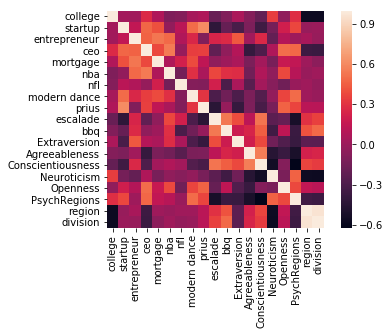

In [7]:
#The color palette represents the amount of correlation among the variables. The lighter shade represents 
#high correlation.

import seaborn as sns
cor = st1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [8]:
# To give equal importance to all features, scale continuous features using MinMaxScaler as the feature matrix is a 
# mix of binary and continuous features 
mms = MinMaxScaler()
mms.fit(st1)
data_transformed = mms.transform(st1)

C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
#For each k value, initialize k-means and use the inertia attribute to identify the sum of squared distances of 
#samples to the nearest cluster centre. As k increases, the sum of squared distance tends to be zero.

#If k is set to its maximum value n #(where n is number of samples) each sample will form its own cluster meaning 
#sum of squared distances equals zero.

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

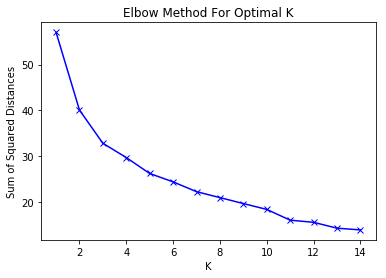

In [10]:
#In the below pot I will pick the elbow at k=3 indicating the optimal k for this dataset is 3.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [11]:
# Use n_clusters=3 as the k value to create the model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [12]:
# Fit the kmeans model to the data
kmeans.fit(st1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# Predict the clusters
predicted_clusters = kmeans.predict(st1)
predicted_clusters

array([1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 0, 1, 2])

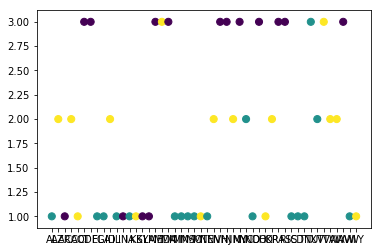

In [60]:
plt.scatter(st1.index, st1['PsychRegions'], c=predicted_clusters, s=50, cmap='viridis')

In [14]:
center = kmeans.cluster_centers_
center

array([[ 3.48000000e-01,  1.67333333e-01,  7.33333333e-02,
         3.86666667e-01,  8.06666667e-02,  1.26000000e-01,
        -1.39333333e-01,  1.27333333e-01, -1.42666667e-01,
        -3.90000000e-01, -5.58666667e-01,  4.90466667e+01,
         4.36800000e+01,  4.17933333e+01,  6.20600000e+01,
         5.01000000e+01,  2.46666667e+00,  1.80000000e+00,
         3.13333333e+00],
       [ 1.55000000e-01, -3.62777778e-01,  3.70000000e-01,
        -2.21111111e-01, -8.88888889e-03,  9.44444444e-02,
        -3.88888889e-03, -3.27777778e-01, -4.77777778e-01,
         5.30000000e-01,  3.09444444e-01,  5.81611111e+01,
         5.80166667e+01,  5.80055556e+01,  4.50111111e+01,
         4.51333333e+01,  1.22222222e+00,  2.55555556e+00,
         4.77777778e+00],
       [-3.40000000e-01,  3.11333333e-01, -4.16000000e-01,
        -2.17333333e-01, -1.54000000e-01, -3.19333333e-01,
         5.66666667e-02,  2.41333333e-01,  5.59333333e-01,
        -1.85333333e-01,  1.92666667e-01,  4.01866667e+01,
    

In [15]:
print(kmeans.labels_)

[1 2 0 2 2 0 0 1 1 2 1 0 1 2 0 0 0 2 0 1 1 1 1 2 1 2 0 0 2 0 1 1 0 2 2 0 0
 1 1 1 1 1 2 2 2 0 1 2]


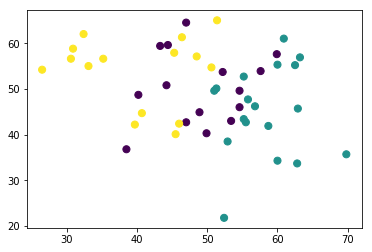

In [126]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Extraversion'], st1['Openness'], c=predicted_clusters, s=50, cmap='viridis')

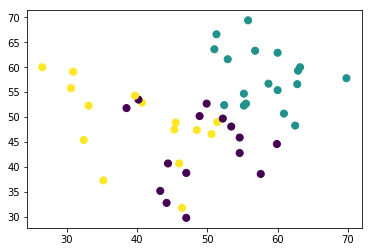

In [127]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Extraversion'], st1['Agreeableness'], c=predicted_clusters, s=50, cmap='viridis')

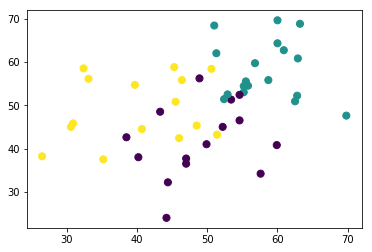

In [128]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Extraversion'], st1['Conscientiousness'], c=predicted_clusters, s=50, cmap='viridis')

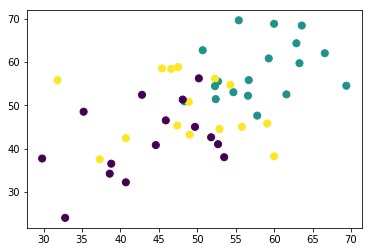

In [131]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Agreeableness'], st1['Conscientiousness'], c=predicted_clusters, s=50, cmap='viridis')

In [48]:
#Compare the predicted vs original PsychRegions for each state
compare_df = pd.DataFrame({'Actual': st1['PsychRegions'], 'Predicted': predicted_clusters}, index=st1.index)
#compare_df.head(50)
compare_df.sort_values('Predicted').reset_index()

,state_code,Actual,Predicted
0,PA,3,0
1,WV,3,0
2,AR,1,0
3,OH,3,0
4,CT,3,0
5,DE,3,0
6,MA,3,0
7,RI,3,0
8,NY,3,0
9,ME,3,0


In [49]:
compare_df.to_excel("kmeansoutput.xlsx")

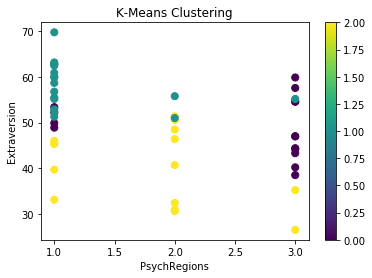

In [17]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(st1['PsychRegions'], st1['Extraversion'], c=predicted_clusters, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PsychRegions')
ax.set_ylabel('Extraversion')
plt.colorbar(scatter)

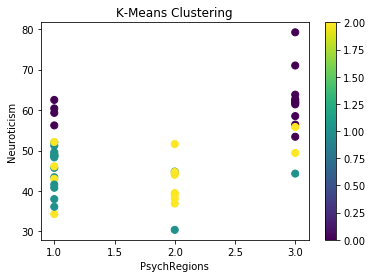

In [18]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(st1['PsychRegions'], st1['Neuroticism'], c=predicted_clusters, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PsychRegions')
ax.set_ylabel('Neuroticism')
plt.colorbar(scatter)

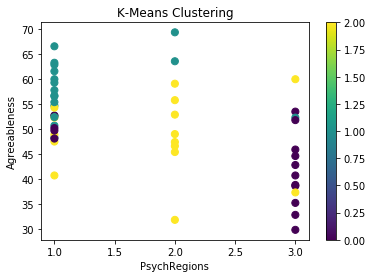

In [19]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(st1['PsychRegions'], st1['Agreeableness'], c=predicted_clusters, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PsychRegions')
ax.set_ylabel('Agreeableness')
plt.colorbar(scatter)

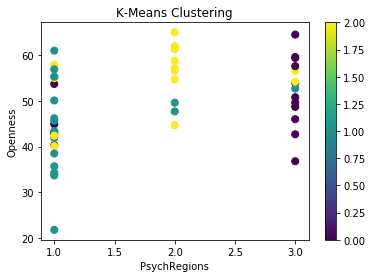

In [20]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(st1['PsychRegions'], st1['Openness'], c=predicted_clusters, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PsychRegions')
ax.set_ylabel('Openness')
plt.colorbar(scatter)

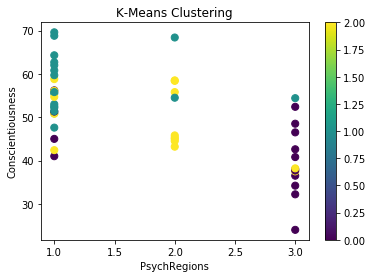

In [21]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(st1['PsychRegions'], st1['Conscientiousness'], c=predicted_clusters, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PsychRegions')
ax.set_ylabel('Conscientiousness')
plt.colorbar(scatter)

In [22]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = st1.index,
           locationmode = 'USA-states',
           z = st1['PsychRegions'], 
           text = st1.index,
           colorbar = {'title':'PsychRegions'})
layout = dict(title = 'US Psych Regions', 
             geo = dict(showframe = False, 
                       projection = {'type': 'albers usa'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# CLUSTERING
## Create Linkage Matrix

In [23]:
Z = linkage(st1, 'ward')

## Plot Dendrogram of Clusters

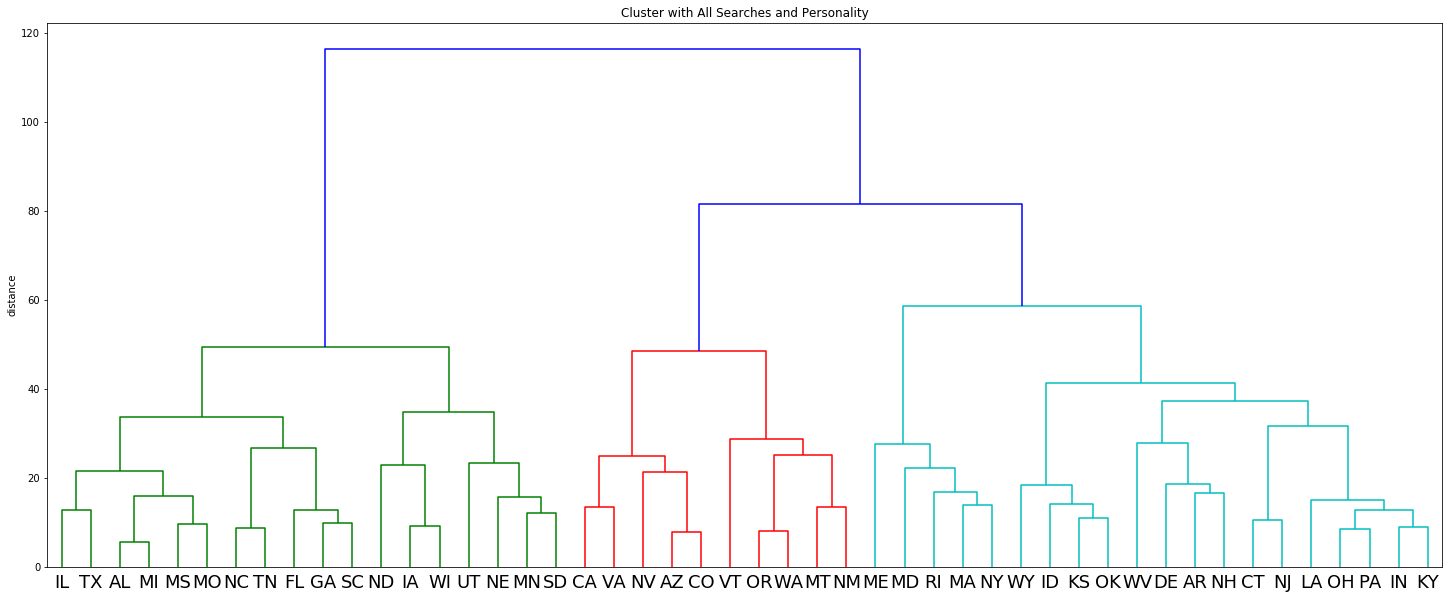

In [24]:
plt.figure(figsize = (25, 10))
plt.title('Cluster with All Searches and Personality')
plt.ylabel('distance')
dendrogram(
    Z,
    labels = st1.index,
    leaf_rotation = 0.,
    leaf_font_size = 18.,
)
plt.show()

In [25]:
X = st[['college','startup','entrepreneur','ceo','mortgage','nba','nfl','modern dance','prius','escalade','bbq','Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'region', 'division']]
y = st['PsychRegions']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
X_scaler = mms.fit(X_train)

C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [28]:
#Transform the training and test data using scaled training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
target_names = ["0", "1", "2"]

k: 1, Train/Test Score: 1.000/0.750
k: 3, Train/Test Score: 0.917/0.667
k: 5, Train/Test Score: 0.861/0.667
k: 7, Train/Test Score: 0.861/0.667
k: 9, Train/Test Score: 0.833/0.667
k: 11, Train/Test Score: 0.778/0.750
k: 13, Train/Test Score: 0.750/0.667
k: 15, Train/Test Score: 0.722/0.667
k: 17, Train/Test Score: 0.722/0.667
k: 19, Train/Test Score: 0.639/0.583


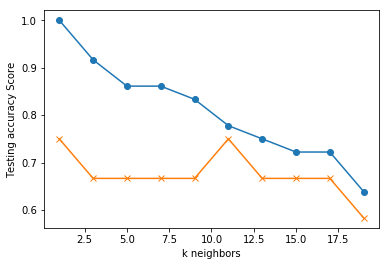

In [61]:
# Loop through different k values and look for the highest accuracy
# Use odd numbers to avoid any ties

from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [121]:
# k: 3 provides the best accuracy where the classifier is stablized on the split sample
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel())
print('k=5 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Accuracy: 0.500


In [122]:
# k: 3 provides the best accuracy where the classifier is stablized. Now fit the entire X, y sample.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
print('k=5 Test Accuracy: %.3f' % knn.score(X, y))

k=5 Test Accuracy: 0.854


In [123]:
#Now, predict the entire X
predicted_class = knn.predict(X)
print(predicted_class)

[1 1 1 2 1 3 3 1 1 1 3 1 1 1 1 1 3 3 3 1 1 1 1 2 1 2 3 3 2 3 1 1 3 1 2 3 3
 1 1 1 1 1 3 2 2 3 1 1]


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted_class, target_names=target_names))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.86      0.60      0.71        10
           2       0.93      0.93      0.93        14

   micro avg       0.85      0.85      0.85        48
   macro avg       0.87      0.82      0.83        48
weighted avg       0.86      0.85      0.85        48



In [125]:
#Compare the predicted vs original PsychRegions for each state for the classification sample
compare_df = pd.DataFrame({'Actual': y, 'Predicted': predicted_class})
compare_df.head(50)
compare_df.sort_values('Predicted').reset_index()

,state_code,Actual,Predicted
0,AL,1,1
1,UT,2,1
2,TX,3,1
3,TN,1,1
4,SD,1,1
5,SC,1,1
6,OK,1,1
7,ND,1,1
8,NC,2,1
9,NE,1,1


In [50]:
#%%html
#<a href="https://public.tableau.com/profile/damodhar5591#!/vizhome/ProfitByCategoryRegion/Sheet5?publish=yes">Pysch Regions</a>